In [5]:
import tensorflow as tf
print(tf.__version__)

2.3.1


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [7]:
from tensorflow.keras.datasets import cifar100

In [8]:
# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [9]:
# Confirm that reloading the dataset does not require a download


#### Examine the Dataset

In [10]:
# Examine the shape of the data.
train_images.shape

(50000, 32, 32, 3)

[41]


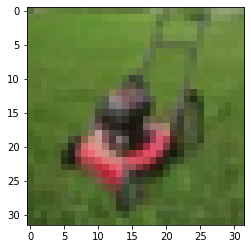

In [11]:
# Examine one of the images and its corresponding label
plt.imshow(train_images[500])
print(train_labels[500])

In [12]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [13]:
# Print a few of the labels
cifar100_fine_labels[41]

'lawn_mower'

In [14]:
# Print the corresponding label for the example above


#### Load the data using different label modes

telephone


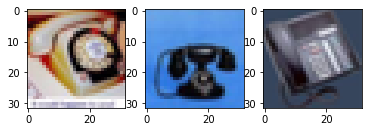

In [15]:
# Display a few examples from category 87 (index 86) and the list of labels
print(cifar100_fine_labels[86])
examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [16]:
# Reload the data using the 'coarse' label mode
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="coarse")

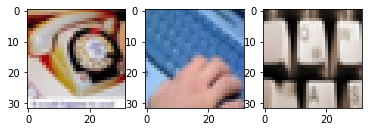

In [17]:
# Display three images from the dataset with the label 6 (index 5)
examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [19]:
# Load the list of coarse labels from a JSON file

# with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
#     cifar100_coarse_labels = json.load(coarse_labels)

In [20]:
# Print a few of the labels



In [21]:
# Print the corresponding label for the example above



#### Load the IMDB Dataset

In [22]:
from tensorflow.keras.datasets import imdb

In [23]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels)  = imdb.load_data()

In [24]:
# Print an example from the training dataset, along with its corresponding label
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [25]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in train_data]

In [26]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [34]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)
(train_data, train_labels), (test_data, test_labels)  = imdb.load_data(skip_top = 50,  oov_char=2)

In [35]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [36]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [37]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [38]:
# Remove the oov_char from the sequences using the filter_list function
train_data = filter_list(train_data)

In [39]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [40]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [42]:
# Load the fertility dataset
import pandas as pd
headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)


In [43]:
# Print the shape of the DataFrame


In [44]:
# Show the head of the DataFrame
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [45]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [46]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [47]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [48]:
# Shuffle the DataFrame
fertility = fertility.sample(frac=1).reset_index(drop=True)

In [49]:
# Show the head of the DataFrame
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-1.00,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0
1,1.00,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0
2,-0.33,0.81,1.0,1.0,1.0,1.0,0.8,-1.0,0.38,0.0
3,-0.33,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0
4,-0.33,0.61,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,0.0


In [50]:
# Convert the field Season to a one-hot encoded vector
fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [51]:
# Show the head of the DataFrame
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
1,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0,0,0,0,1
2,0.81,1.0,1.0,1.0,1.0,0.8,-1.0,0.38,0.0,0,1,0,0
3,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0,0,1,0,0
4,0.61,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,0.0,0,1,0,0


In [52]:
# Move the Output column such that it is the last column in the DataFrame
fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [53]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
1,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0,0,0,0,1
2,0.81,1.0,1.0,1.0,1.0,0.8,-1.0,0.38,0.0,0,1,0,0
3,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0,0,1,0,0
4,0.61,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,0.0,0,1,0,0


In [54]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [55]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [56]:
# Verify the shape of the training data
training.shape
validation.shape

(30, 13)

In [57]:
# Separate the features and labels for the validation and training data
training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [247]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [248]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [249]:
# Test the generator using the next() function
next(train_generator)

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

#### Build the model

In [250]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

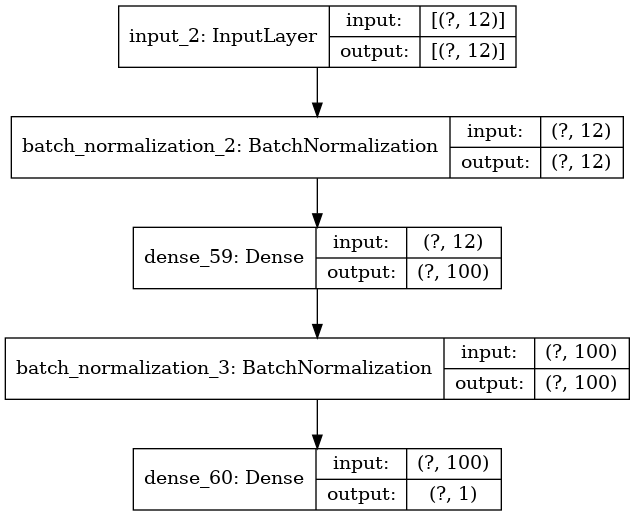

In [251]:
# Display the model summary to show the resultant structure
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

#### Compile the model

In [252]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [253]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [254]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [255]:
# Set the epochs to 3
epochs = 3

In [256]:
# Train the model
for epoch in range(epochs):    
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, validation_labels, batch_size = 30)
    model.fit_generator(train_generator, validation_data=validation_generator)

ValueError: in user code:

    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer batch_normalization_2 is incompatible with the layer: expected ndim=2, found ndim=4. Full shape received: [None, None, None, None]


In [257]:
# Try to run the fit_generator function once more; observe what happens

# model.fit_generator(train_generator, steps_per_epoch=train_steps)

#### Make an infinitely looping generator

In [258]:
# Create a function that returns an infinitely looping generator
def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [259]:
# Create a generator using this function.
train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [260]:
# Assert that the new cyclic generator does not raise a StopIteration
for i in range(2*100000):
    next(train_generator_cyclic)

In [261]:
# Generate a cyclic validation generator
validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [262]:
# Train the model
model.fit(train_generator_cyclic, validation_data= validation_generator_cyclic, epochs = epochs, steps_per_epoch = train_steps, validation_steps=1 )

Epoch 1/3


ValueError: in user code:

    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer batch_normalization_2 is incompatible with the layer: expected ndim=2, found ndim=4. Full shape received: [None, None, None, None]


#### Evaluate the model and get predictions

In [ ]:
# Let's obtain a validation data generator.
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

# Get predictions on the validation data
predictions = model.predict_generator(validation_generator, steps=1)
np.round(predictions.T)

In [ ]:
# Print the corresponding validation labels
print(validation_labels)

In [ ]:
# Obtain a validation data generator
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

# Evaluate the model
model.evaluate(validation_generator)


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [263]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [264]:
from tensorflow.keras.datasets import cifar10

In [265]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

training_features.shape, training_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [266]:
# Convert the labels to a one-hot encoding
num_classes = 10
training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)
training_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#### Create a generator function

In [297]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [298]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [299]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


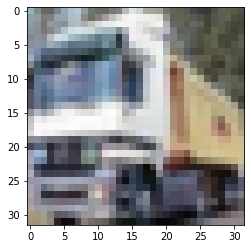

In [300]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [329]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels, batch_size=1)

#### Create a data augmention generator

In [330]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [331]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [332]:
# Create an ImageDataGenerator object
image_generator = ImageDataGenerator(preprocessing_function=monochrome, rotation_range=30, rescale=1/255.0)

image_generator.fit(train_images)

In [333]:
training_features.shape

(50000, 32, 32, 3)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [342]:
# Create an iterable generator using the `flow` function
image_generator_iterable = image_generator.flow(training_features[:10], training_labels[:10], batch_size=1)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


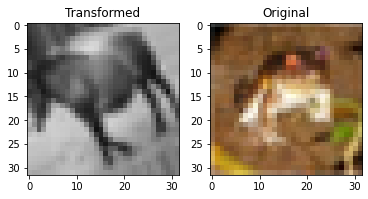

In [344]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
print(label, label_orig)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [354]:
# Inspect the directory structure
train_path = 'data/flowers-recognition-split'
val_path = 'data/flowers-recognition-split'

In [355]:
# Create an ImageDataGenerator object
datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [356]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [390]:
# Create a training data generator
train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(128,128))

Found 4323 images belonging to 5 classes.


In [391]:
# Create a validation data generator
val_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(128,128))

Found 4323 images belonging to 5 classes.


[0. 0. 1. 0. 0.]


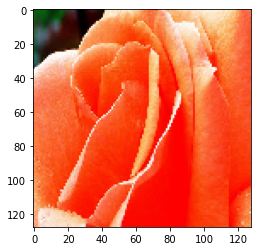

In [392]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [393]:
# Reset the training generator



#### Create a model to train

In [395]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((128,128,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 128, 128, 8)       1544      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 8)         4104      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 8)           4104      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 4, 4, 4)         

In [396]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [397]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [398]:
# Print the model summary

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 128, 128, 8)       1544      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 8)         4104      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 8)           4104      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 4, 4, 4)         

#### Train the model

In [399]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

67 67


In [400]:
# Fit the model
model.fit_generator(train_generator, epochs = 20)


Epoch 1/20
68/68 [==============================] - 17s 253ms/step - loss: 1.5295 - accuracy: 0.3100 - val_loss: 1.4171 - val_accuracy: 0.3747
Epoch 2/20
68/68 [==============================] - 17s 245ms/step - loss: 1.3585 - accuracy: 0.4120 - val_loss: 1.2715 - val_accuracy: 0.4573
Epoch 3/20
68/68 [==============================] - 17s 248ms/step - loss: 1.2686 - accuracy: 0.4557 - val_loss: 1.2146 - val_accuracy: 0.5394
Epoch 4/20
68/68 [==============================] - 17s 247ms/step - loss: 1.2182 - accuracy: 0.5205 - val_loss: 1.1516 - val_accuracy: 0.5635
Epoch 5/20
68/68 [==============================] - 17s 248ms/step - loss: 1.1582 - accuracy: 0.5487 - val_loss: 1.1147 - val_accuracy: 0.5607
Epoch 6/20
68/68 [==============================] - 17s 246ms/step - loss: 1.1188 - accuracy: 0.5707 - val_loss: 1.0963 - val_accuracy: 0.5980
Epoch 7/20
68/68 [==============================] - 17s 245ms/step - loss: 1.0830 - accuracy: 0.5880 - val_loss: 1.0444 - val_accuracy: 0.5991

#### Evaluate the model

In [403]:
# Evaluate the model
model.evaluate_generator(val_generator, steps = val_steps)

[0.7514092922210693, 0.7308768630027771]

#### Predict using the generator

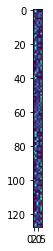

In [413]:
# Predict labels with the model
imshow(model.predict_generator(val_generator, steps = 2))


***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#### Create a simple dataset

In [2]:
x = np.zeros((100,10,2,2))

In [6]:
# Create a dataset from the tensor x
dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [10]:
# Inspect the Dataset object
dataset1.element_spec

TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)

In [11]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [14]:
# Try creating a dataset from the tensor x2
try:
    dataset2 = tf.data.Dataset.from_tensor_slices(x2)
except Exception:
    print("Error!")

Error!


In [21]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [24]:
# Create another dataset from the new x2 and inspect the Dataset object
dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [25]:
# Print the element_spec
print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [26]:
# Combine the two datasets into one larger dataset
dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [30]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [31]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [32]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [33]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [45]:
# Create a Dataset from the MNIST data
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [46]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [60]:
# Inspect the length of an element using the take method
element = next(iter(mnist_dataset.take(1)))

In [66]:
# Examine the shapes of the data
print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [70]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/file_1.txt', 'data/shakespeare/file_2.txt']


In [71]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

a b c







In [80]:
# Load the lines from the files into a dataset using TextLineDataset
shakespeare_dataset= tf.data.TextLineDataset(text_files)

In [85]:
list(shakespeare_dataset)

[<tf.Tensor: shape=(), dtype=string, numpy=b'a b c'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'asd fasd fasdf asdf '>]

In [87]:
# Use the take method to get and print the first 5 lines of the dataset
first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'a b c', shape=(), dtype=string)
tf.Tensor(b'asd fasd fasdf asdf ', shape=(), dtype=string)
tf.Tensor(b'asdf', shape=(), dtype=string)
tf.Tensor(b'asdf', shape=(), dtype=string)
tf.Tensor(b'asdfasdfasdfa', shape=(), dtype=string)


In [89]:
# Compute the number of lines in the first file
lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

1


In [92]:
# Compute the number of lines in the shakespeare dataset we created
shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

8


#### Interleave lines from the text data files

In [93]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/file_1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/file_2.txt', shape=(), dtype=string)


In [107]:
# Interleave the lines from the text files 
interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length = 2)

In [108]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'a b c', shape=(), dtype=string)
tf.Tensor(b'asd fasd fasdf asdf ', shape=(), dtype=string)
tf.Tensor(b'asdf', shape=(), dtype=string)
tf.Tensor(b'asdf', shape=(), dtype=string)
tf.Tensor(b'asdfasdfasdfa', shape=(), dtype=string)
tf.Tensor(b'sdf', shape=(), dtype=string)
tf.Tensor(b'asdf', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [256]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

In [257]:
# Load the CSV file into a pandas DataFrame
bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [258]:
# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [259]:
# Print the shape of the DataFrame
print(bank_dataframe.shape)

(45211, 17)


In [260]:
# Select features from the DataFrame
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']
bank_dataframe = bank_dataframe.filter(features + labels)

In [261]:
# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [262]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [263]:
# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


In [264]:
# Shuffle the DataFrame
bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)
bank_dataframe

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,34,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",single,"(0, 0, 1, 0)","(0,)",1058,"(1,)","(0,)","(0, 0, 1)",2,-1,"(0, 0, 0, 1)",yes
1,36,"(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",single,"(0, 1, 0, 0)","(0,)",10041,"(1,)","(0,)","(1, 0, 0)",2,184,"(0, 1, 0, 0)",no
2,41,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(1, 0, 0, 0)","(0,)",1428,"(1,)","(1,)","(1, 0, 0)",1,-1,"(0, 0, 0, 1)",no
3,30,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",single,"(0, 0, 1, 0)","(0,)",73,"(0,)","(0,)","(1, 0, 0)",6,-1,"(0, 0, 0, 1)",no
4,32,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",single,"(0, 1, 0, 0)","(0,)",413,"(1,)","(0,)","(1, 0, 0)",1,-1,"(0, 0, 0, 1)",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,37,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",married,"(0, 1, 0, 0)","(0,)",1978,"(0,)","(0,)","(1, 0, 0)",1,-1,"(0, 0, 0, 1)",yes
45207,38,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",married,"(0, 1, 0, 0)","(0,)",-475,"(1,)","(0,)","(1, 0, 0)",1,-1,"(0, 0, 0, 1)",no
45208,38,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",single,"(0, 0, 1, 0)","(0,)",8,"(1,)","(0,)","(1, 0, 0)",2,-1,"(0, 0, 0, 1)",no
45209,41,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",1680,"(1,)","(0,)","(0, 0, 1)",2,-1,"(0, 0, 0, 1)",no


In [265]:
import pprint
pprint.pprint(dict(bank_dataframe))

{'age': 0        34
1        36
2        41
3        30
4        32
         ..
45206    37
45207    38
45208    38
45209    41
45210    56
Name: age, Length: 45211, dtype: int64,
 'balance': 0         1058
1        10041
2         1428
3           73
4          413
         ...  
45206     1978
45207     -475
45208        8
45209     1680
45210      589
Name: balance, Length: 45211, dtype: int64,
 'campaign': 0        2
1        2
2        1
3        6
4        1
        ..
45206    1
45207    1
45208    2
45209    2
45210    2
Name: campaign, Length: 45211, dtype: int64,
 'contact': 0        (0, 0, 1)
1        (1, 0, 0)
2        (1, 0, 0)
3        (1, 0, 0)
4        (1, 0, 0)
           ...    
45206    (1, 0, 0)
45207    (1, 0, 0)
45208    (1, 0, 0)
45209    (0, 0, 1)
45210    (0, 0, 1)
Name: contact, Length: 45211, dtype: object,
 'default': 0        (0,)
1        (0,)
2        (0,)
3        (0,)
4        (0,)
         ... 
45206    (0,)
45207    (0,)
45208    (0,)
45209    (0,)
45

#### Create the Dataset object

In [268]:
# Convert the DataFrame to a Dataset
bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_dataframe))

# Note: I found there is something wrong with this call.

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tuple).

In [267]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'job': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(), dtype=tf.string, name=None),
 'default': TensorSpec(shape=(), dtype=tf.string, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'housing': TensorSpec(shape=(), dtype=tf.string, name=None),
 'loan': TensorSpec(shape=(), dtype=tf.string, name=None),
 'contact': TensorSpec(shape=(), dtype=tf.string, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'poutcome': TensorSpec(shape=(), dtype=tf.string, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Filter the Dataset

In [227]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'single'


In [228]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [229]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [233]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 1 if x['y'] == tf.constant([b'yes'], dtype =tf.string) else 0
    return x

bank_dataset = bank_dataset.map(map_label)

In [234]:
# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'job': TensorSpec(shape=(), dtype=tf.string, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(), dtype=tf.string, name=None),
 'default': TensorSpec(shape=(), dtype=tf.string, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'housing': TensorSpec(shape=(), dtype=tf.string, name=None),
 'loan': TensorSpec(shape=(), dtype=tf.string, name=None),
 'contact': TensorSpec(shape=(), dtype=tf.string, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'poutcome': TensorSpec(shape=(), dtype=tf.string, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [241]:
# Remove the 'marital' column
bank_dataset = bank_dataset.map(lambda x: {k:v for k,v in x.items() if k != 'marital'})

In [243]:
# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'job': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(), dtype=tf.string, name=None),
 'default': TensorSpec(shape=(), dtype=tf.string, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'housing': TensorSpec(shape=(), dtype=tf.string, name=None),
 'loan': TensorSpec(shape=(), dtype=tf.string, name=None),
 'contact': TensorSpec(shape=(), dtype=tf.string, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'poutcome': TensorSpec(shape=(), dtype=tf.string, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [244]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [245]:
# Map this function over the dataset

bank_dataset.map(map_feature_label)

ValueError: in user code:

    <ipython-input-244-af6a019e55e3>:6 map_feature_label  *
        return (tf.concat(features, axis=0), x['y'])
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:1654 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:1221 concat_v2
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3477 _create_op_internal
        ret = Operation(
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/zhentao/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 1 but is rank 0 for '{{node concat}} = ConcatV2[N=11, T=DT_STRING, Tidx=DT_INT32](concat/values_0, concat/values_1, concat/values_2, args_3, args_4, args_5, args_6, args_7, args_8, concat/values_9, args_10, concat/axis)' with input shapes: [1], [1], [1], [], [], [], [], [], [], [1], [], [].


In [ ]:
# Inspect the Dataset object


#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

In [ ]:
# Make training and validation sets from the dataset



#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

#### Train the model

In [ ]:
# Create batched training and validation datasets



In [ ]:
# Shuffle the training data



In [ ]:
# Fit the model



In [ ]:
# Plot the training and validation accuracy

